Hi Everyone, my name is Eva van Dijk and these are my results of the data case for the VodafoneZiggo application. I will write about what I did to get these results and why they would be intersting for Stack Overflow. This company is eager to get some more insights on user behavior and trends on their platform. I also commented on the code for extra clarity.

A disclaimer about this notebook: for some analysis a subset of the data was used instead of the whole dataset, because of the limited computation power. 

In [1]:
#import basic and needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import posts dataset
df1 = pd.read_csv("stackoverflow2015_posts.csv") 
df_posts = pd.DataFrame(df1)

In [4]:
#import user dataset
df2 = pd.read_csv("stackoverflow2015_users.csv") 
df_user = pd.DataFrame(df2)

First, some basic statistics were investigated. The amount of answers, comments, favorites and views were included in the posts datasets. The mean of these variables was calculated first, to have a little insight into each variable. However, a mean is not a very accurate measurement if lots of outliers are included in the dataset. 
Therefor, boxplots were made to serve as a good representation of the distribution of the data including the outliers. This analysis will help Stack Overflow to understand the kind of data they have and to see if it equal to their expectations. They can act on these boxplots if they would like to see different distributions. For example, if the amount of comments is lots higher than the amount of answers, perhaps the answers are not sufficient enough and lots of comments are needed for clarification. Then they could think about a (better) way to screen the clarity of the answers and to remove wrong answers.
Two boxplots were made, one for the amount of views and one for the other three variables. The combination boxplot was made, because it was assumed that these values were more similar.

In [5]:
#The mean of the four variables is calculated and printed
print(df_posts['answer_count'].mean())
print(df_posts['comment_count'].mean())
print(df_posts['favorite_count'].mean())
print(df_posts['view_count'].mean())

1.2125379395228306
1.667391559261489
1.1128982793921356
233.4552047792286


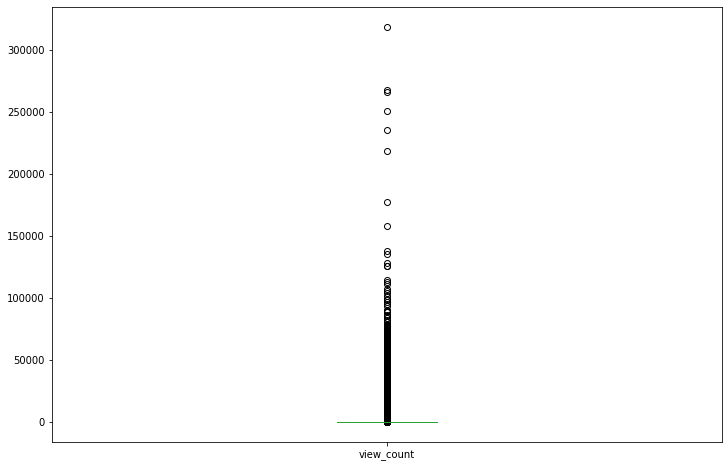

In [6]:
#the boxplot for the amount of views
df_posts['view_count'].plot(kind='box', return_type='axes', figsize=(12,8), showbox=True)

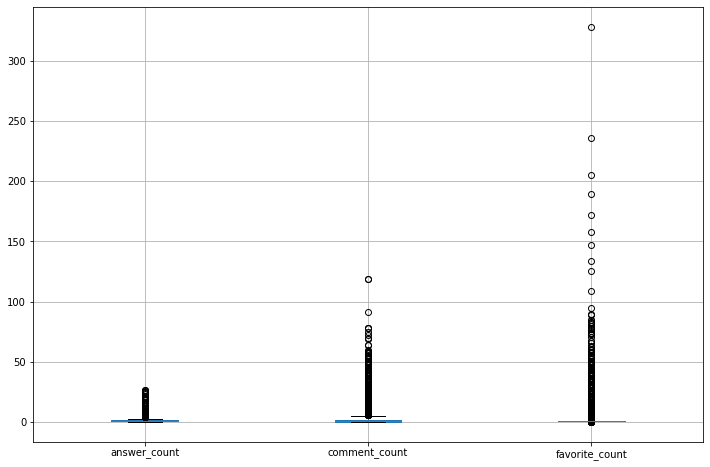

In [7]:
#the boxplot for the amount of answers, comments and favorites. 
df_posts.boxplot(column=['answer_count', 'comment_count', 'favorite_count'], figsize=(12,8))

Another interesting analysis would be a topic analysis on the posts. The posts included a title and a word cloud was made from this. The word cloud is vizualization of words used in the title and the bigger the word, the higher the frequency of the word. This is a nice way to see which topics are popular and which are less. The stopwords were removed from the titles, to have a more interesting outcome. 
This word cloud would be interesting for Stack Overflow to see the topics of the posts of their users. For example, if there are a lot of questions about Python, perhaps Stack Overflow could could cooperate with another company and offer python coursework. Or they could create different subgroups per major topic to group the related questions. They can really anticipate on the posts of their users if they know what they are about. 
In the future, it would be very nice to also add a time slider to this word cloud, to make it possible to see how the popular topics change over time. 


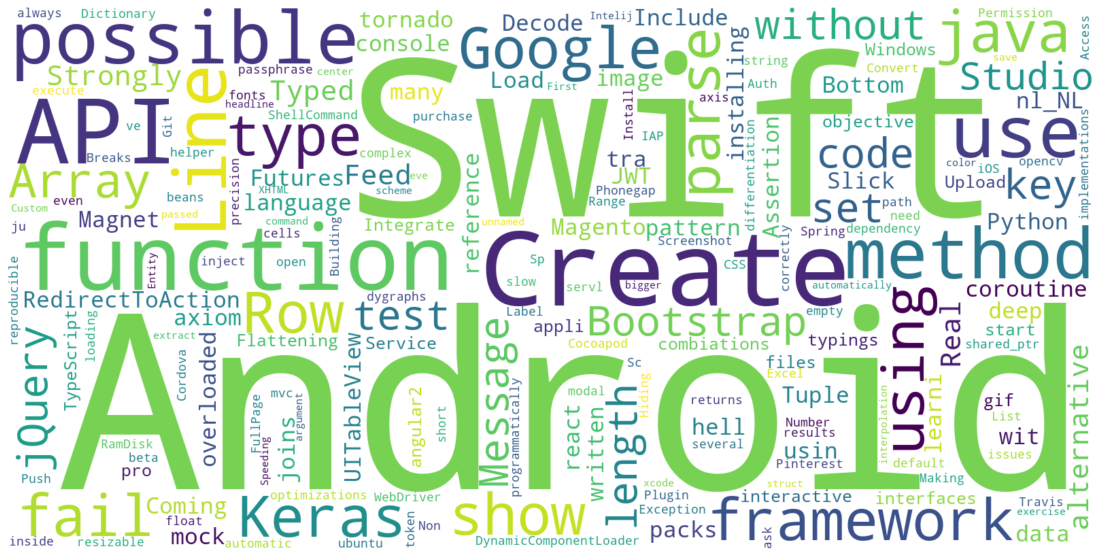

In [8]:
#the stopwords were removed from the titles and a word cloud was drawn.
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = STOPWORDS.copy()

text = str(df_posts['title'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', width=1600, height=800, stopwords=stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The next part is about the amount of posts per time unit. The amount of posts per month and per hour were calculated to have insight into the amount of users posting during a certain period of time. It would be very interesting for Stack Overflow to know which are busy months and hours during the day, because then they know when their site is busy. They also know the best moment for advertisement. Also, they can anticiplate on these numbers by hiring extra support staff to be able to handle the amount of posts.

For this analysis, a subset of 10000 rows was used because of the limited computation power and time. 

In [9]:
#select the first 10000 rows and transform the creation_date to type datetime
creation_date = df_posts['creation_date'].iloc[:100000]
creation_date = pd.to_datetime(creation_date)


[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

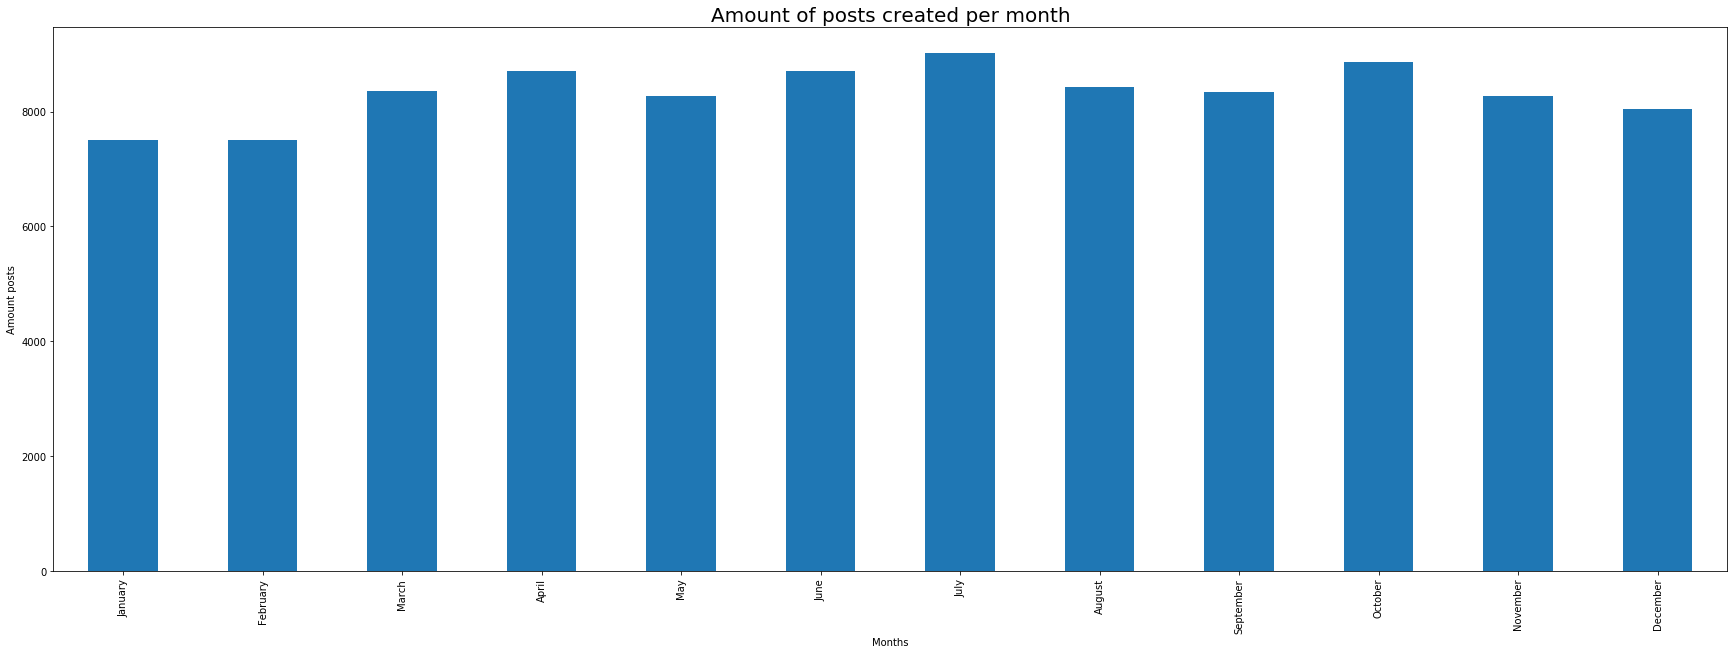

In [10]:
#this is a histogram showing the amount of posts per month. 
SMALL_SIZE = 20

creation_date.index = creation_date 
freq_month = creation_date.resample('M').count()
freq_month = pd.DataFrame(freq_month)


fig, ax = plt.subplots(figsize=(30,10))
freq_month.plot(ax=ax, kind='bar', legend=False)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.xlabel('Months')
plt.ylabel('Amount posts')
plt.title('Amount of posts created per month')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'January'
labels[1] = 'February'
labels[2] = 'March'
labels[3] = 'April'
labels[4] = 'May'
labels[5] = 'June'
labels[6] = 'July'
labels[7] = 'August'
labels[8] = 'September'
labels[9] = 'October'
labels[10] = 'November'
labels[11] = 'December'
ax.set_xticklabels(labels)

In [11]:
#the hours of the datetime were extracted and the amount of posts per hour was calculated
creation_date2 = creation_date.index.hour
creation_date2 = pd.DataFrame(creation_date2)
freq_hour = np.unique(creation_date2['creation_date'], return_counts=True)

Text(0.5, 1.0, 'Amount of posts created per hour')

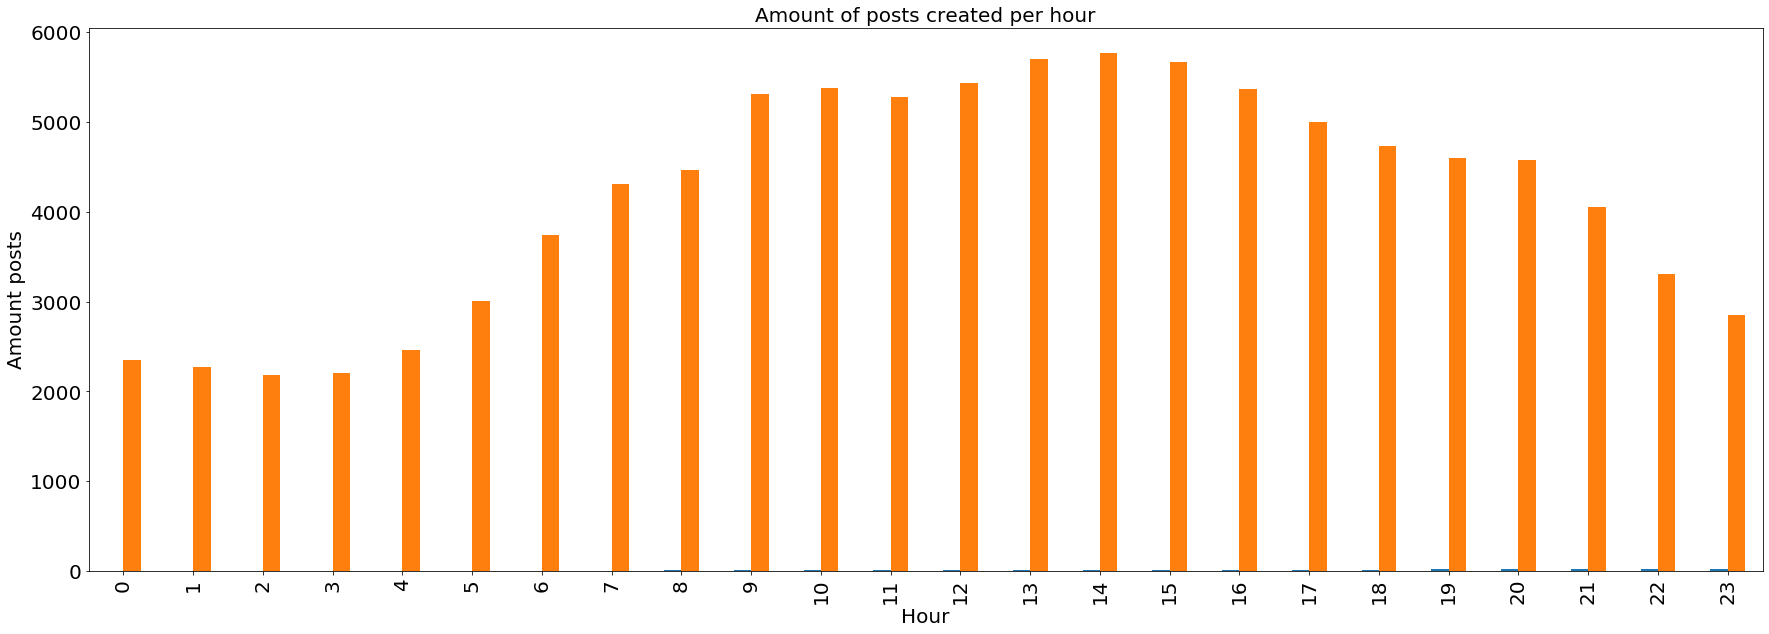

In [12]:
#this is a histogram of the amount of posts per hour duing the day
freq_hour = pd.DataFrame(freq_hour)
freq_hour = pd.DataFrame.transpose(freq_hour)

freq_hour

fig, ax = plt.subplots(figsize=(30,10))
freq_hour.plot(ax=ax, kind='bar', legend=False)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.xlabel('Hour')
plt.ylabel('Amount posts')
plt.title('Amount of posts created per hour')

The last analysis, is to see where the users are from. Stack Overflow wants to know their users, but there is not much information provided besides the location of the user. Therefor, the coordinates of the location has been extracted from the country name and have been drawn on a map. Now, it is visible for Stack Overflow where their users are from and they can anticipate on this. For example, subgroups per country can be made to communicate easily with each other. Also, they can cooperate with companies from that region to provide suited advertisement/coursework. 

A subset of 100 rows was taken for this analysis, because of the limited computation power. This coordinate extraction needed lots of computation power, so therefor only hundred rows were done.

In [13]:
#import basic and needed packages
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim()
import numpy as np

C:\Users\Eva van Dijk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


In [14]:
#function to extract coordinates from country name
#sometimes a city name has also been added, so then the coordinates of this will be returned
#if it is impossible to link the country name, nan will be returned
def geolocate(city=None, country=None):
    '''
    Inputs city and country, or just country. Returns the lat/long coordinates of 
    either the city if possible, if not, then returns lat/long of the center of the country.
    '''
    
    # If the city exists,
    if city != None:
        # Try
        try:
            # To geolocate the city and country
            loc = geolocator.geocode(str(city + ',' + country))
            # And return latitude and longitude
            return (loc.latitude, loc.longitude)
        # Otherwise
        except:
            # Return missing value
            return np.nan
    # If the city doesn't exist
    else:
        # Try
        try:
            # Geolocate the center of the country
            loc = geolocator.geocode(country)
            # And return latitude and longitude 
            return (loc.latitude, loc.longitude)
        # Otherwise
        except:
            # Return missing value
            return np.nan

In [15]:
#the longitude and latitude of a subset of 100 rows will calculated using the previous function
geolist = list()
for x in df_user['location'].iloc[:100]:
    geolist.append(geolocate(country= str(x)))

In [18]:
#import shape file of the world
import geopandas as gpd
from shapely.geometry import Point, Polygon
world = gpd.read_file('ne_50m_admin_0_countries_lakes/ne_50m_admin_0_countries_lakes.shp')

In [19]:
#transform longitude and latitude points to a dataframe
geolist = pd.DataFrame(geolist)
geolist.columns = ['lat', 'lon']


In [20]:
#creat actual coordinate points from the langitude and latitude and add this to the dataframe

# designate coordinate system
crs = {'init':'espc:4326'}

# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(geolist['lon'], geolist['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(geolist,
 crs = crs,
 geometry = geometry)

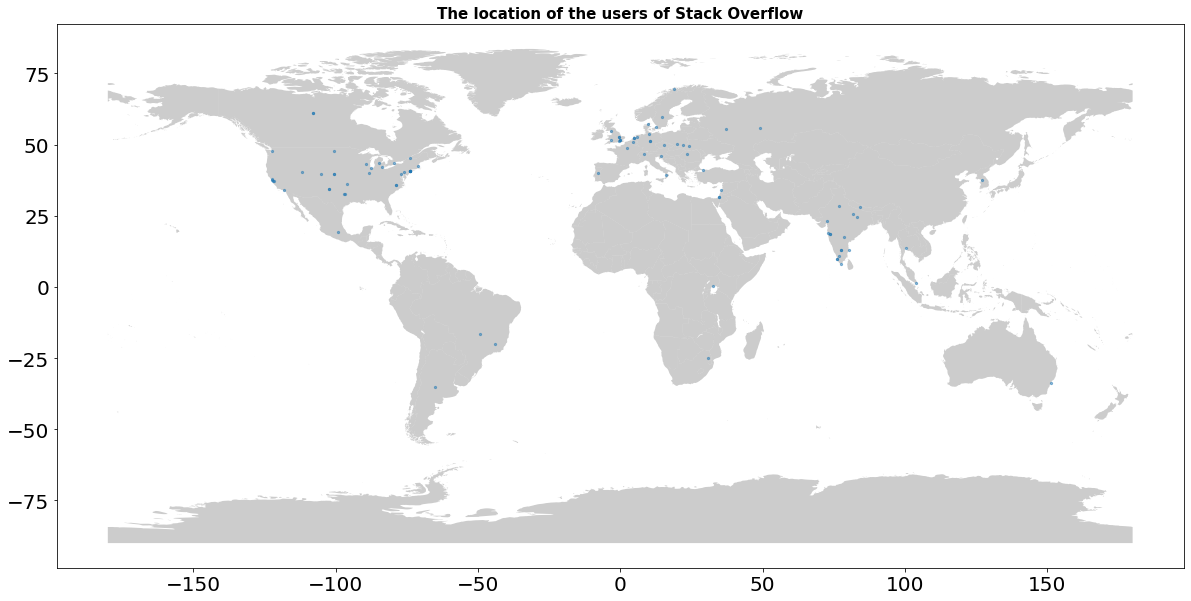

In [21]:
#this is plot of the shape file of the world and the locations of the users are drawn on it
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(50,10))

world.plot(ax=ax, alpha=0.4, color='grey')

geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=5)

plt.title('The location of the users of Stack Overflow', fontsize=15,fontweight='bold')

plt.show()